In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

## Data Ingession

In [2]:
# Import Data
data = pd.read_csv('advertising.csv')

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
#Check Null
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## EDA

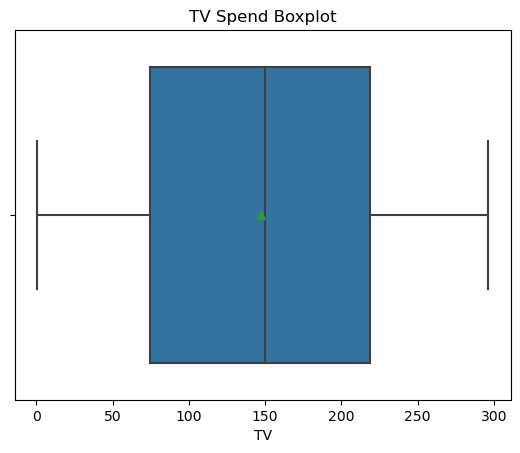

In [7]:
#Check for oulier
sns.boxplot(x=data['TV'], showmeans=True)
plt.title("TV Spend Boxplot")
plt.show()

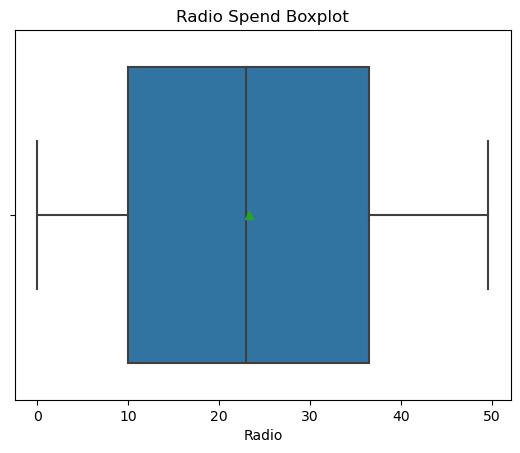

In [8]:
#Check for oulier
sns.boxplot(x=data['Radio'], showmeans=True)
plt.title("Radio Spend Boxplot")
plt.show()

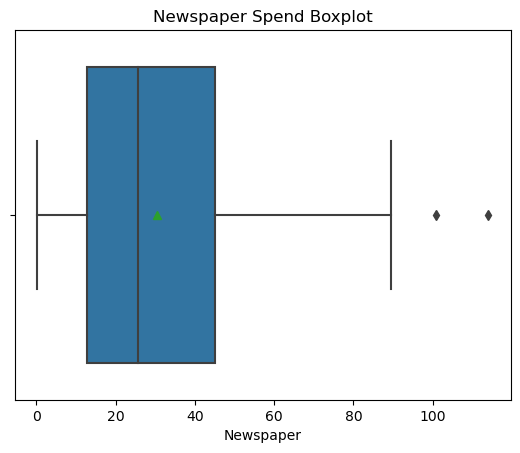

In [9]:
#Check for oulier
sns.boxplot(x=data['Newspaper'], showmeans=True)
plt.title("Newspaper Spend Boxplot")
plt.show()

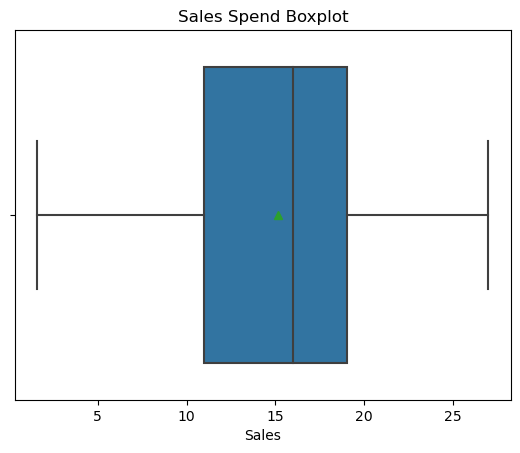

In [10]:
#Check for oulier
sns.boxplot(x=data['Sales'], showmeans=True)
plt.title("Sales Spend Boxplot")
plt.show()

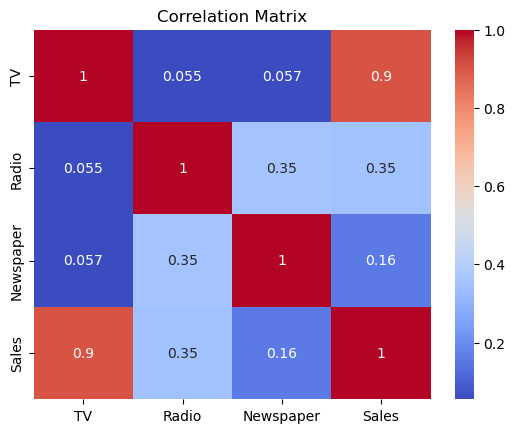

In [11]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap ='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Feature Engineering

In [12]:
data['total_spend'] = data['TV'] + data['Radio'] + data['Newspaper']

In [13]:
data.head()

,TV,Radio,Newspaper,Sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0


In [14]:
data['TV_to_radio_ratio'] = data['TV'] / data['Radio']
data['newspaper_to_total_spend_ratio'] = data['Newspaper'] / data['total_spend']

In [15]:
data.head()

,TV,Radio,Newspaper,Sales,total_spend,TV_to_radio_ratio,newspaper_to_total_spend_ratio
0,230.1,37.8,69.2,22.1,337.1,6.087302,0.205280
1,44.5,39.3,45.1,10.4,128.9,1.132316,0.349884
2,17.2,45.9,69.3,12.0,132.4,0.374728,0.523414
3,151.5,41.3,58.5,16.5,251.3,3.668281,0.232789
4,180.8,10.8,58.4,17.9,250.0,16.740741,0.233600


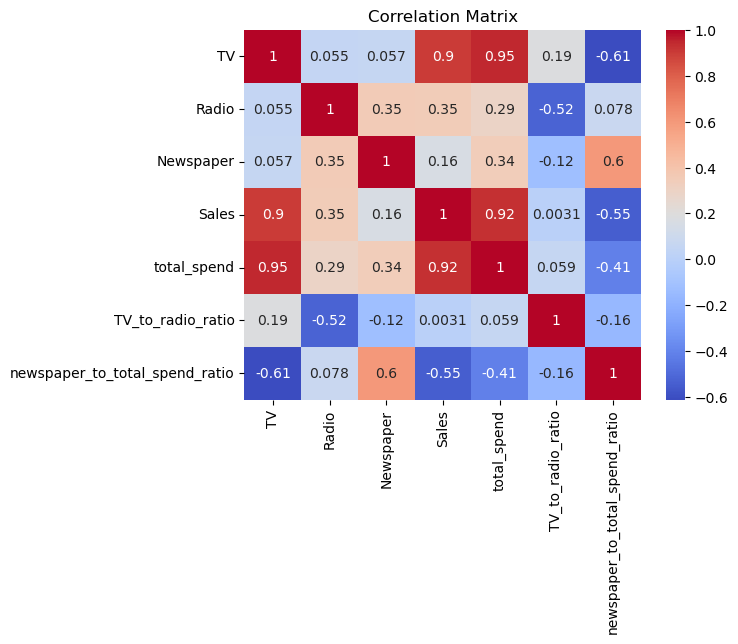

In [16]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap ='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Scaling

In [17]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales', 'total_spend', 'TV_to_radio_ratio',
       'newspaper_to_total_spend_ratio'],
      dtype='object')

In [18]:
data[data['TV_to_radio_ratio']==np.inf]

,TV,Radio,Newspaper,Sales,total_spend,TV_to_radio_ratio,newspaper_to_total_spend_ratio
127,80.2,0.0,9.2,11.9,89.4,inf,0.102908


In [19]:
infinite_mask = (data['TV_to_radio_ratio']==np.inf)
data.loc[infinite_mask, "TV_to_radio_ratio"] = 0

In [20]:
data[data['TV_to_radio_ratio']==np.inf]

,TV,Radio,Newspaper,Sales,total_spend,TV_to_radio_ratio,newspaper_to_total_spend_ratio


In [21]:
data.isnull().sum()

TV                                0
Radio                             0
Newspaper                         0
Sales                             0
total_spend                       0
TV_to_radio_ratio                 0
newspaper_to_total_spend_ratio    0
dtype: int64

In [22]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(data, data['Sales'], test_size=.3, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 7)
(60, 7)
(140,)
(60,)


## Modelling

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [27]:
y_pred

array([16.9, 22.4, 21.4,  7.3, 24.7, 12.6, 22.3,  8.4, 16.5, 16.1, 11. ,
        8.7, 16.9,  5.3, 10.3, 16.7,  5.5, 16.6, 11.3, 18.9, 19.7, 12.5,
       10.9, 22.2, 11.3,  8.1, 21.7, 13.4, 10.6,  5.7, 15.6, 11.3, 23.7,
        8.7, 16.1, 20.7, 11.6, 20.8, 11.9,  6.9, 11. , 14.8, 10.1,  9.7,
       16.6,  7.6, 10.5, 14.6, 10.4, 12. , 14.6, 16.7,  7.2,  6.6,  9.4,
       11. , 10.9, 25.4,  7.6, 16.7])

## Evaluation

In [30]:
mse = mean_squared_error(y_test, y_pred)
accuracy = r2_score(y_test, y_pred)
print('Mean squared error', mse)
print('Accuracy', accuracy)

Mean squared error 1.9945033220337916e-29
Accuracy 1.0
